In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

# Interactive Session 13

In [2]:
phillips=woo.data('PHILLIPS')

In [3]:
woo.data('PHILLIPS',description=True)

name of dataset: phillips
no of variables: 7
no of observations: 56

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| year     | 1948 through 2003             |
| unem     | civilian unemployment rate, % |
| inf      | percentage change in CPI      |
| inf_1    | inf[_n-1]                     |
| unem_1   | unem[_n-1]                    |
| cinf     | inf - inf_1                   |
| cunem    | unem - unem_1                 |
+----------+-------------------------------+

Economic Report of the President, 2004, Tables B-42 and B-64.


In [4]:
phillips['infl']=phillips['inf'] #Python does not like using inf because it represents infinity

In [5]:
mod1=ols('infl~unem',data=phillips).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   infl   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.579
Date:                Sat, 07 Jan 2023   Prob (F-statistic):             0.0639
Time:                        09:20:10   Log-Likelihood:                -139.43
No. Observations:                  56   AIC:                             282.9
Df Residuals:                      54   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0536      1.548      0.681      0.4

In [6]:
phillips['e']=mod1.resid
phillips['e2']=mod1.resid**2
phillips['e_l']=phillips['e'].shift(1)

In [7]:
mod2=ols('e~unem',data=phillips).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                 6.438e-15
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               1.00
Time:                        09:20:11   Log-Likelihood:                -139.43
No. Observations:                  56   AIC:                             282.9
Df Residuals:                      54   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.91e-15      1.548   1.23e-15      1.0

In [8]:
mod3=ols('e2~unem',data=phillips).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                     e2   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5453
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.463
Time:                        09:20:11   Log-Likelihood:                -229.65
No. Observations:                  56   AIC:                             463.3
Df Residuals:                      54   BIC:                             467.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9814      7.753      0.385      0.7

In [9]:
mod4=ols('e~e_l',data=phillips).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     27.91
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.43e-06
Time:                        09:20:11   Log-Likelihood:                -124.21
No. Observations:                  55   AIC:                             252.4
Df Residuals:                      53   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1118      0.318     -0.352      0.7

# Session 13 Slides

<AxesSubplot:ylabel='Frequency'>

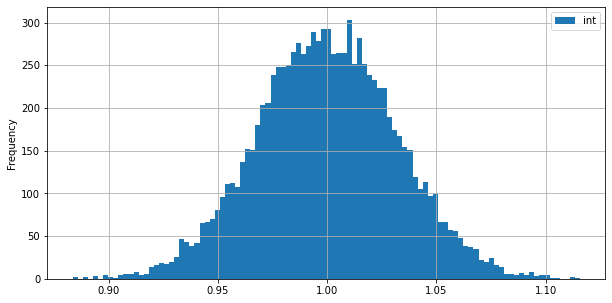

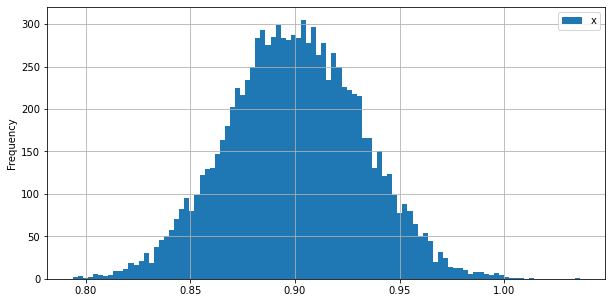

In [10]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
T=10000  #The number of trials
N=1000  #The number of observations in each regression


b=[]
for i in range(T):
      x=np.random.normal(0,1,N)
      y=1+.9*x+np.random.normal(0,1,N)
      x=np.array(x)
      x=add_constant(x)
      mod=OLS(y,x).fit()  
      b=b+[mod.params]
b=pd.DataFrame(b)
b.columns=['int','x']
b.plot(kind='hist',y='int',bins=100,grid=True)
b.plot(kind='hist',y='x',bins=100,grid=True)